In [76]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
%matplotlib inline

In [149]:
df = pd.read_csv('train.csv')

In [150]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [151]:
df = df.drop(['Name','Cabin','Ticket'],1)
df['Embarked'] = df['Embarked'].fillna('Q')

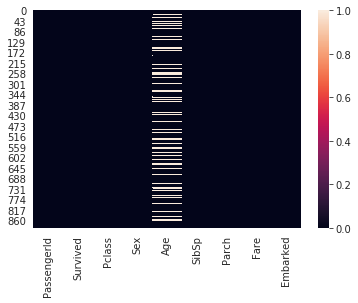

In [152]:
sns.heatmap(df.isnull())

In [153]:
df = df.fillna(0)

(array([201.,  20.,   6.,  14.,   7.,  12.,  56.,  65.,  43.,  72.,  65.,
         44.,  51.,  47.,  25.,  34.,  26.,  14.,  25.,  14.,  11.,  11.,
          9.,   6.,   6.,   0.,   5.,   1.,   0.,   1.]),
 array([ 0.        ,  2.66666667,  5.33333333,  8.        , 10.66666667,
        13.33333333, 16.        , 18.66666667, 21.33333333, 24.        ,
        26.66666667, 29.33333333, 32.        , 34.66666667, 37.33333333,
        40.        , 42.66666667, 45.33333333, 48.        , 50.66666667,
        53.33333333, 56.        , 58.66666667, 61.33333333, 64.        ,
        66.66666667, 69.33333333, 72.        , 74.66666667, 77.33333333,
        80.        ]),
 <a list of 30 Patch objects>)

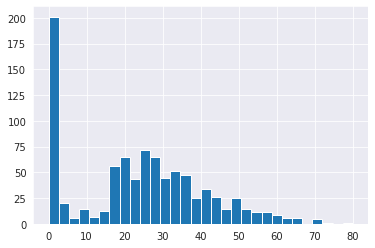

In [154]:
sns.set_style('darkgrid')
plt.hist(df['Age'],bins=30)

([<matplotlib.patches.Wedge at 0x7fc9b93a4fd0>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')])

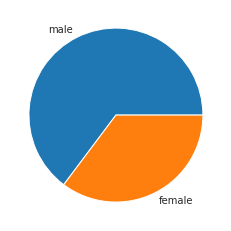

In [155]:
labels = df['Sex'].unique()
plt.pie(df['Sex'].value_counts(),labels=labels)

In [156]:
label_encoder = preprocessing.LabelEncoder()

In [157]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [158]:
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [159]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

In [160]:
X = df.drop(['Survived'],1)
y = df['Survived']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [162]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [163]:
accuracy = clf.score(X_test, y_test)

In [164]:
print(accuracy)

0.6135593220338983


In [167]:
from sklearn.model_selection import GridSearchCV


In [172]:
param_grid = {'C':[0.1,1,10,100,1000,10000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(svm.SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.630, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.630, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.630, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.622, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=0.01, score=0.630, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.630, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.622, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.630, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.630, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.630, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] .................. C=10, gamma=0.0001, score=0.683, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.655, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.630, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.630, total=   0.0s
[CV] C=10, gamma=0.0001 ..............................................
[CV] .................. C=10, gamma=0.0001, score=0.647, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.625, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=0.630, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[CV] ................. C=10000, gamma=0.01, score=0.588, total=   0.0s
[CV] C=10000, gamma=0.01 .............................................
[CV] ................. C=10000, gamma=0.01, score=0.546, total=   0.0s
[CV] C=10000, gamma=0.01 .............................................
[CV] ................. C=10000, gamma=0.01, score=0.563, total=   0.0s
[CV] C=10000, gamma=0.001 ............................................
[CV] ................ C=10000, gamma=0.001, score=0.525, total=   0.0s
[CV] C=10000, gamma=0.001 ............................................
[CV] ................ C=10000, gamma=0.001, score=0.588, total=   0.0s
[CV] C=10000, gamma=0.001 ............................................
[CV] ................ C=10000, gamma=0.001, score=0.538, total=   0.0s
[CV] C=10000, gamma=0.001 ............................................
[CV] ................ C=10000, gamma=0.001, score=0.563, total=   0.0s
[CV] C=10000, gamma=0.001 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [173]:
grid.best_params_

{'C': 10000, 'gamma': 0.0001}

In [170]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [174]:
grid_accuracy = grid.score(X_test, y_test)
print(grid_accuracy)

0.7254237288135593
